<a href="https://www.kaggle.com/code/faiqueali/in-progress-data-preprocessing?scriptVersionId=141837925" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv


# Imports

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [3]:
DATASET_PATH = '/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv'
REGEX_MOVIE_YEAR = r'\(\d{4}\)|\([MDCLXVI]+(?:M{0,3}D?C{0,3}L?X{0,3}V?I{0,3})\)\(\d{4}\)|\([MDCLXVI]+(?:M{0,3}D?C{0,3}L?X{0,3}V?I{0,3})\)'

# Helpers

In [4]:
def get_genre_count(dataframe):
    # Initialize an empty dictionary to store genre counts
    genre_count = {}

    # Split the 'GENRE' column by ',' and stack the resulting Series
    genre_series = dataframe.str.split(', ').explode()

    # Use value_counts to get the genre counts and convert it to a dictionary
    genre_count = genre_series.value_counts().to_dict()
    
    return genre_count

# Gather Data

In [5]:
# Load the dataset
data = pd.read_csv(DATASET_PATH)

# Show first 10 values
data.head(10)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
6,The Last Letter from Your Lover,(2021),"\nDrama, Romance",6.8,\nA pair of interwoven stories set in the past...,\n Director:\nAugustine Frizzell\n| \n S...,"5,283",110.0,NaN
7,Dexter,(2006–2013),"\nCrime, Drama, Mystery",8.6,"\nBy day, mild-mannered Dexter is a blood-spat...","\n \n Stars:\nMichael C. Hall, \...","665,387",53.0,NaN
8,Never Have I Ever,(2020– ),\nComedy,7.9,\nThe complicated life of a modern-day first g...,\n \n Stars:\nMaitreyi Ramakrish...,"34,530",30.0,NaN
9,Virgin River,(2019– ),"\nDrama, Romance",7.4,"\nSeeking a fresh start, nurse practitioner Me...",\n \n Stars:\nAlexandra Breckenr...,"27,279",44.0,NaN


In [6]:
data.shape

(9999, 9)

#### Check for null values in dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
data.isna().sum().to_frame('Null Values Count')

,Null Values Count
MOVIES,0
YEAR,644
GENRE,80
RATING,1820
ONE-LINE,0
STARS,0
VOTES,1820
RunTime,2958
Gross,9539


#### Check for duplicates

In [9]:
data.duplicated().sum()

431

In [10]:
# Dropping the duplication
data.drop_duplicates(inplace=True)
data.shape

(9568, 9)

In [11]:
data.isna().sum().to_frame('Null Values Count')

,Null Values Count
MOVIES,0
YEAR,542
GENRE,78
RATING,1400
ONE-LINE,0
STARS,0
VOTES,1400
RunTime,2560
Gross,9108


# Clean Data

In [12]:
# Remove unnecessary attributes
remove_columns = ['ONE-LINE', 'STARS']
data = data.drop(columns=remove_columns, axis=1)
data.head(5)

,MOVIES,YEAR,GENRE,RATING,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,"17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,"885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,"414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,NaN,NaN,NaN


In [13]:
# Remove rows where YEAR, GENRE, RATING, VOTES, RUNTIME AND GROSS is NaN
df_removed_na_attributes_movies = data[
    (data['YEAR'].isna()) & \
    (data['RATING'].isna()) & \
    (data['VOTES'].isna()) & \
    (data['RunTime'].isna()) & \
    (data['Gross'].isna())
]
df_removed_na_attributes_movies.shape

(521, 7)

In [14]:
df_removed_na_attributes_movies.head()

,MOVIES,YEAR,GENRE,RATING,VOTES,RunTime,Gross
878,Vikings: Valhalla,NaN,"\nAction, Adventure, Drama",NaN,NaN,NaN,NaN
1375,Resident Evil,NaN,"\nAction, Horror, Sci-Fi",NaN,NaN,NaN,NaN
1414,Bright 2,NaN,"\nAction, Adventure, Crime",NaN,NaN,NaN,NaN
1419,Avatar: The Last Airbender,NaN,"\nAction, Adventure, Fantasy",NaN,NaN,NaN,NaN
1425,Home Team,NaN,"\nComedy, Sport",NaN,NaN,NaN,NaN


In [15]:
# (~) bitwise NOT of NAN entries
data =  data[~
    ((data['YEAR'].isna()) & \
    (data['RATING'].isna()) & \
    (data['VOTES'].isna()) & \
    (data['RunTime'].isna()) & \
    (data['Gross'].isna()))
]

data.shape

(9047, 7)

#### Remove NAN and change column data types

In [16]:
# [FOR 'GENRE'] Remove '\n' and empty spaces
data['GENRE'] = data['GENRE'].str.replace('\n', '').str.strip()
data['GENRE'].fillna('None', inplace=True)

In [17]:
# [FOR 'VOTES'] Remove ',' and NAN
data['VOTES'] = data['VOTES'].str.replace(',', '', regex=True)
data['VOTES'].fillna('0', inplace=True)
data['VOTES'] = data['VOTES'].astype(int)

In [18]:
# [FOR 'RUNTIME'] fill missing values
data['RunTime'].fillna(0.0, inplace=True)

In [19]:
# [FOR 'GROSS'] Remove '$' , '.'
data['Gross'] = data['Gross'].str.replace('$', '').str.replace('M', '000000').str.replace('.','')
data['Gross'].fillna('0', inplace=True)
data['Gross'] = data['Gross'].astype(int)

In [20]:
# [FOR 'RATING'] fill missing values
data['RATING'].fillna(0.0, inplace=True)

In [21]:
# [FOR 'YEAR'] fill missing values
data['YEAR'].fillna('Unknown', inplace=True)

In [22]:
data.isna().sum().to_frame('Null Values Count')

,Null Values Count
MOVIES,0
YEAR,0
GENRE,0
RATING,0
VOTES,0
RunTime,0
Gross,0


# Data Transformation

#### Add conditional column to distinguish between Movie and Series

In [23]:
# Create a conditional column "Type"
data['Type'] = data['YEAR'].apply(lambda x: 'Movie' if pd.notna(x) and pd.Series(x).str.match(REGEX_MOVIE_YEAR).any() else 'Series')
data.head(5)

,MOVIES,YEAR,GENRE,RATING,VOTES,RunTime,Gross,Type
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,21062,121.0,0,Movie
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,17870,25.0,0,Series
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,885805,44.0,0,Series
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,414849,23.0,0,Series
4,Army of Thieves,(2021),"Action, Crime, Horror",0.0,0,0.0,0,Movie


In [24]:
genre_count = get_genre_count(data['GENRE'])
genre_count

{'Drama': 3891,
 'Comedy': 2624,
 'Action': 1990,
 'Animation': 1525,
 'Adventure': 1469,
 'Crime': 1461,
 'Documentary': 1198,
 'Thriller': 839,
 'Romance': 807,
 'Mystery': 803,
 'Fantasy': 501,
 'Horror': 491,
 'Family': 419,
 'Reality-TV': 365,
 'History': 342,
 'Biography': 299,
 'Sci-Fi': 282,
 'Short': 244,
 'Music': 198,
 'Sport': 185,
 'Game-Show': 97,
 'Talk-Show': 89,
 'Musical': 56,
 'War': 46,
 'None': 38,
 'News': 23,
 'Western': 22,
 'Film-Noir': 12}

In [25]:
# Check unique values
data.nunique()

MOVIES     6374
YEAR        439
GENRE       505
RATING       83
VOTES      4130
RunTime     262
Gross       332
Type          2
dtype: int64

### Check insights, correlation and covariance

In [26]:
df_insights = data[['RATING', 'VOTES', 'RunTime', 'Gross']]
df_insights.describe()

,RATING,VOTES,RunTime,Gross
count,9047.000000,9.047000e+03,9047.000000,9.047000e+03
mean,6.247386,1.367299e+04,53.351387,2.222047e+08
std,2.354648,6.675761e+04,50.593504,2.090196e+09
min,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,5.800000,9.400000e+01,21.000000,0.000000e+00
50%,6.900000,5.860000e+02,45.000000,0.000000e+00
75%,7.700000,3.195000e+03,89.000000,0.000000e+00
max,9.900000,1.713028e+06,853.000000,5.040100e+10


In [27]:
df_insights.corr()

,RATING,VOTES,RunTime,Gross
RATING,1.000000,0.109467,0.119531,0.032984
VOTES,0.109467,1.000000,0.179222,0.588945
RunTime,0.119531,0.179222,1.000000,0.140307
Gross,0.032984,0.588945,0.140307,1.000000


In [28]:
df_insights.cov()

,RATING,VOTES,RunTime,Gross
RATING,5.544368e+00,1.720725e+04,1.423976e+01,1.623375e+08
VOTES,1.720725e+04,4.456579e+09,6.053211e+05,8.217940e+13
RunTime,1.423976e+01,6.053211e+05,2.559703e+03,1.483754e+10
Gross,1.623375e+08,8.217940e+13,1.483754e+10,4.368921e+18


# Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

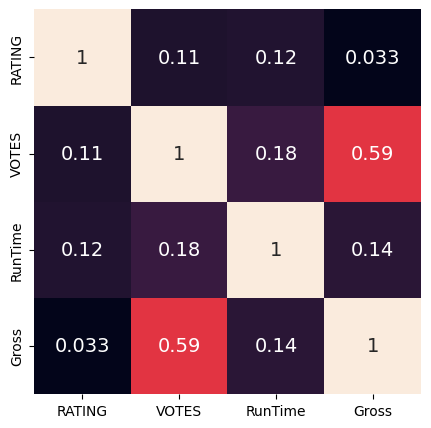

In [29]:
# [HEAT MAP] Plotting Correlation between the variables
# Setting plot size
plt.figure(figsize=(5,5))
sns.heatmap(df_insights.corr(), annot=True, cbar=False, annot_kws={'size': 14})
plt.show

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


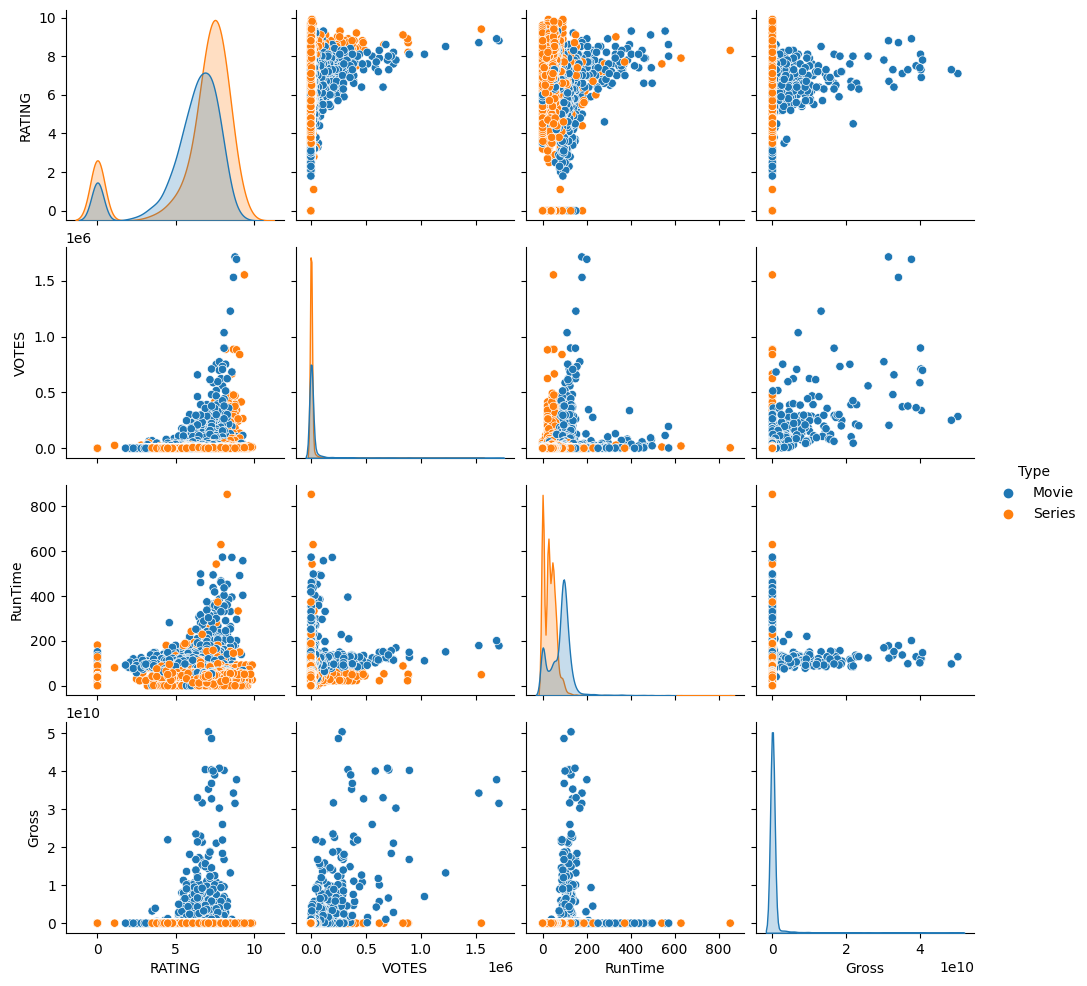

In [30]:
sns.pairplot(data, hue='Type')